# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kosh-agach
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | nova vicosa
Processing Record 8 of Set 1 | luena
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | manay
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | broome
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | yylanly
City not found. Skipping...
Processing Record 19 of Set 1 | ghanzi
Processing Record 20 of Set 1 | trans-en-provence
Processing Record 21 of Set 1 

Processing Record 36 of Set 4 | sondrio
Processing Record 37 of Set 4 | jianshui
Processing Record 38 of Set 4 | darwin
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | edgewater
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | inirida
Processing Record 43 of Set 4 | sodra sandby
Processing Record 44 of Set 4 | camana
Processing Record 45 of Set 4 | kapuskasing
Processing Record 46 of Set 4 | saudarkrokur
Processing Record 47 of Set 4 | hawaiian paradise park
Processing Record 48 of Set 4 | muli
Processing Record 49 of Set 4 | xinhui
Processing Record 0 of Set 5 | timimoun
Processing Record 1 of Set 5 | wilmington
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | lihue
Processing Record 4 of Set 5 | saipan
Processing Record 5 of Set 5 | ust-nera
Processing Record 6 of Set 5 | atafu village
Processing Record 7 of Set 5 | alotau
City not found. Skipping...
Processing Record 8 of Set 5 | choele choel
Processing

Processing Record 28 of Set 8 | durham
Processing Record 29 of Set 8 | labuan
Processing Record 30 of Set 8 | stephenville
Processing Record 31 of Set 8 | berezovyy
Processing Record 32 of Set 8 | ayr
Processing Record 33 of Set 8 | franca
Processing Record 34 of Set 8 | sault ste. marie
Processing Record 35 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 36 of Set 8 | novodvinsk
Processing Record 37 of Set 8 | rawatsar
Processing Record 38 of Set 8 | sur
Processing Record 39 of Set 8 | kintampo
Processing Record 40 of Set 8 | new norfolk
Processing Record 41 of Set 8 | gunnedah
Processing Record 42 of Set 8 | fuglafjordur
Processing Record 43 of Set 8 | lepsy
Processing Record 44 of Set 8 | artigas
Processing Record 45 of Set 8 | ciudad madero
Processing Record 46 of Set 8 | lazaro cardenas
Processing Record 47 of Set 8 | orcopampa
Processing Record 48 of Set 8 | kzyltu
Processing Record 49 of Set 8 | tucuma
Processing Record 0 of Set 9 | juegang
Processing Re

Processing Record 18 of Set 12 | villa union
Processing Record 19 of Set 12 | anton lizardo
Processing Record 20 of Set 12 | mandalgovi
Processing Record 21 of Set 12 | settat
Processing Record 22 of Set 12 | nar'yan-mar
Processing Record 23 of Set 12 | puerto santa
Processing Record 24 of Set 12 | elverum
Processing Record 25 of Set 12 | guasdualito
Processing Record 26 of Set 12 | rahim yar khan
City not found. Skipping...
Processing Record 27 of Set 12 | lincoln
Processing Record 28 of Set 12 | sanluri
Processing Record 29 of Set 12 | greymouth
Processing Record 30 of Set 12 | dauphin
Processing Record 31 of Set 12 | san vicente
Processing Record 32 of Set 12 | kruisfontein
Processing Record 33 of Set 12 | island harbour
Processing Record 34 of Set 12 | harare
Processing Record 35 of Set 12 | nieuw amsterdam
Processing Record 36 of Set 12 | katsuren-haebaru
Processing Record 37 of Set 12 | namibe
Processing Record 38 of Set 12 | ouadda
Processing Record 39 of Set 12 | peace river
Pr

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kosh-agach,50.0000,88.6667,267.76,88,88,1.34,RU,1701895782
1,stanley,54.8680,-1.6985,275.24,90,0,2.06,GB,1701895541
2,port elizabeth,-33.9180,25.5701,293.76,94,100,8.75,ZA,1701895521
3,udachny,66.4167,112.4000,247.03,100,100,1.25,RU,1701895785
4,albany,42.6001,-73.9662,273.47,88,99,0.89,US,1701895755


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kosh-agach,50.0000,88.6667,267.76,88,88,1.34,RU,1701895782
1,stanley,54.8680,-1.6985,275.24,90,0,2.06,GB,1701895541
2,port elizabeth,-33.9180,25.5701,293.76,94,100,8.75,ZA,1701895521
3,udachny,66.4167,112.4000,247.03,100,100,1.25,RU,1701895785
4,albany,42.6001,-73.9662,273.47,88,99,0.89,US,1701895755


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

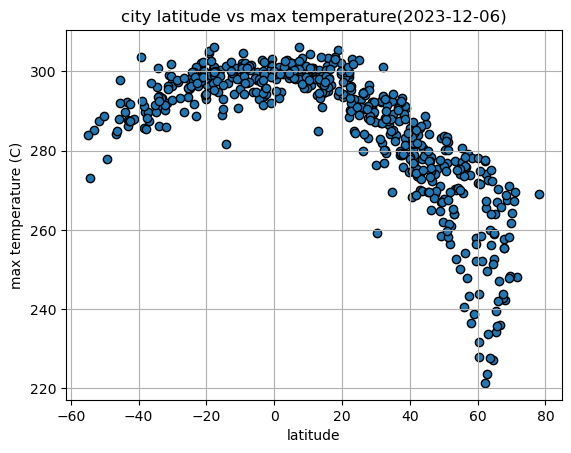

In [87]:
# Build scatter plot for latitude vs. temperature

lat_temp_plt = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("max temperature (C)")
plt.title("city latitude vs max temperature(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

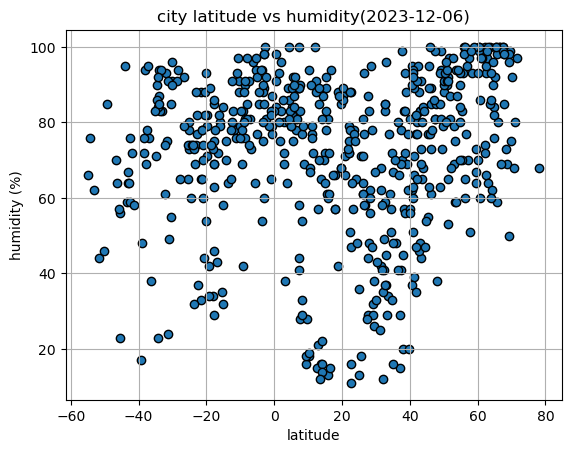

In [89]:
# Build scatter plot for latitude vs. humidity

lat_hum_plt = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("humidity (%)")
plt.title("city latitude vs humidity(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

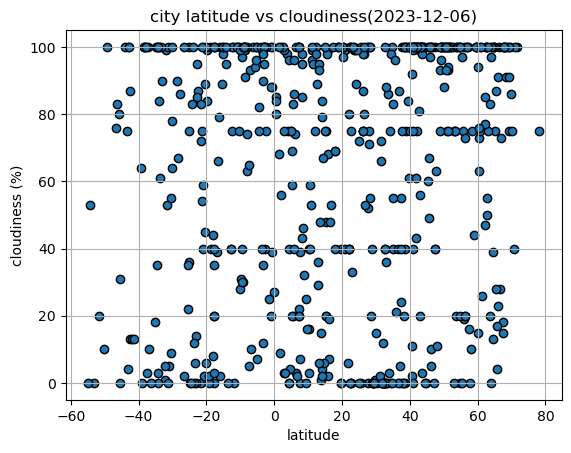

In [90]:
# Build scatter plot for latitude vs. cloudiness

lat_cloud_plt = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("cloudiness (%)")
plt.title("city latitude vs cloudiness(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

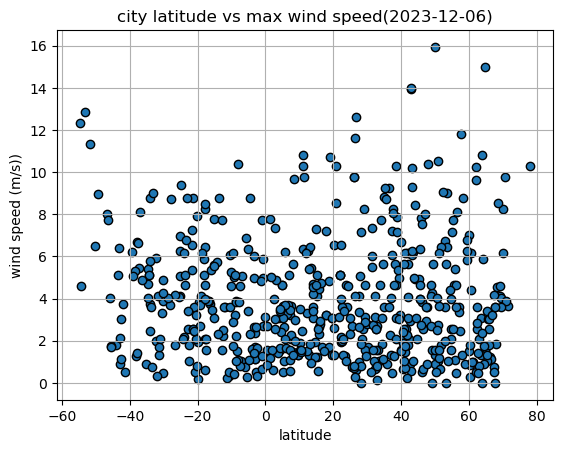

In [92]:
# Build scatter plot for latitude vs. wind

lat_wind_plt = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("wind speed (m/s))")
plt.title("city latitude vs max wind speed(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [114]:
# Define a function to create Linear Regression plots
def lin_regress_plots():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(5, 5), fontsize=15, color="red")
    return


In [115]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kosh-agach,50.0000,88.6667,267.76,88,88,1.34,RU,1701895782
1,stanley,54.8680,-1.6985,275.24,90,0,2.06,GB,1701895541
3,udachny,66.4167,112.4000,247.03,100,100,1.25,RU,1701895785
4,albany,42.6001,-73.9662,273.47,88,99,0.89,US,1701895755
5,san patricio,28.0170,-97.5169,296.55,48,71,5.05,US,1701895787


In [116]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port elizabeth,-33.9180,25.5701,293.76,94,100,8.75,ZA,1701895521
6,nova vicosa,-17.8919,-39.3719,299.22,75,0,4.65,BR,1701895788
7,luena,-11.7833,19.9167,294.25,78,0,3.60,AO,1701895790
10,port-aux-francais,-49.3500,70.2167,277.90,85,100,8.98,TF,1701895539
11,adamstown,-25.0660,-130.1015,296.11,78,100,5.06,PN,1701895500


###  Temperature vs. Latitude Linear Regression Plot

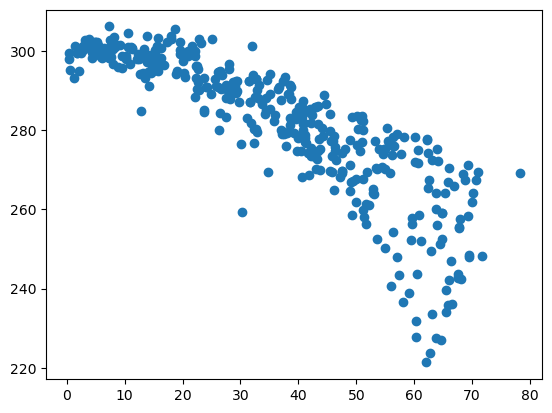

In [117]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
lin_regress_plots()
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.show()

The r-value is: 0.4121057168607245


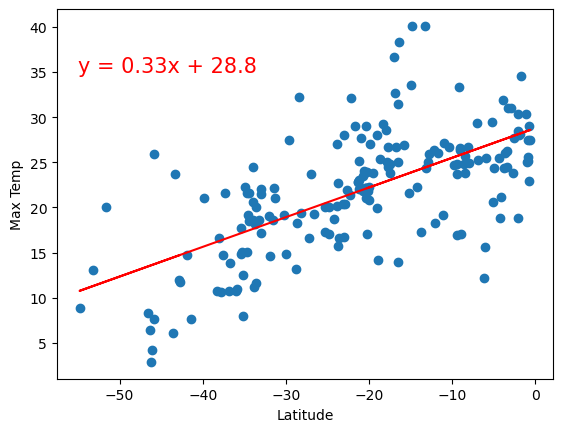

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


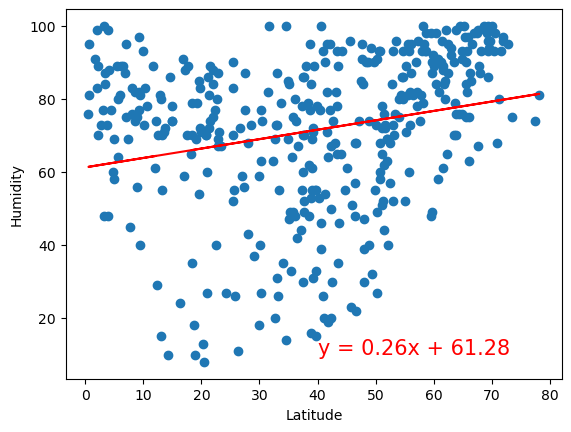

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


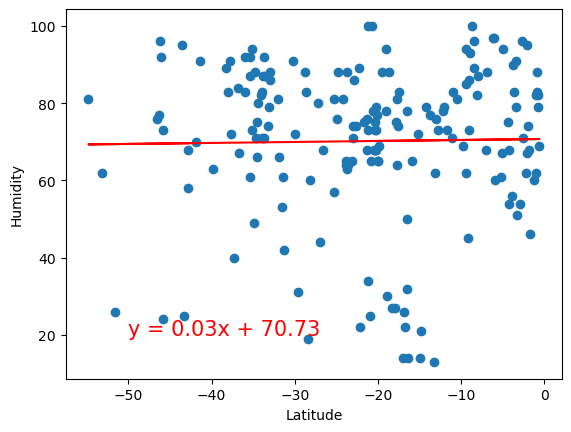

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


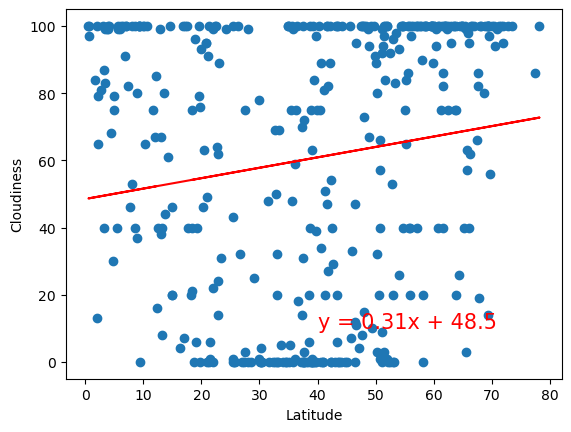

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


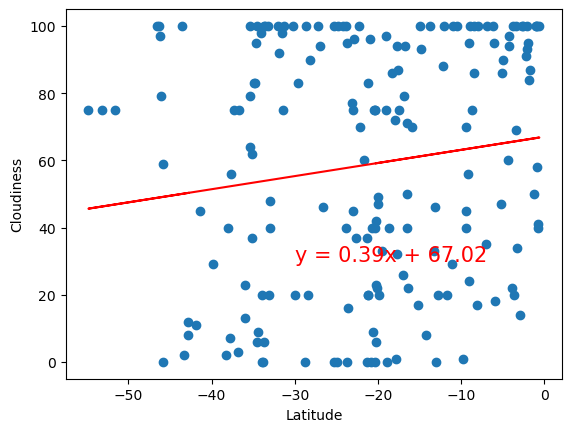

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


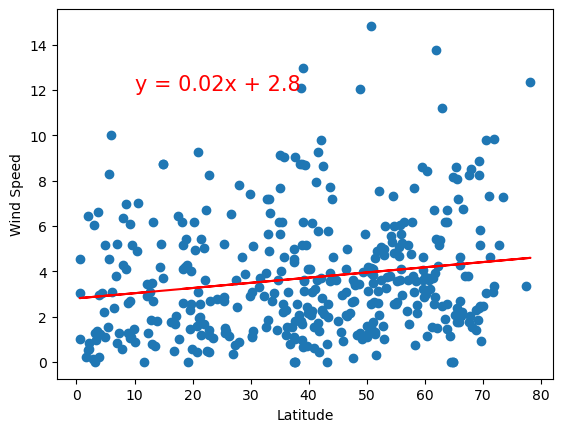

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


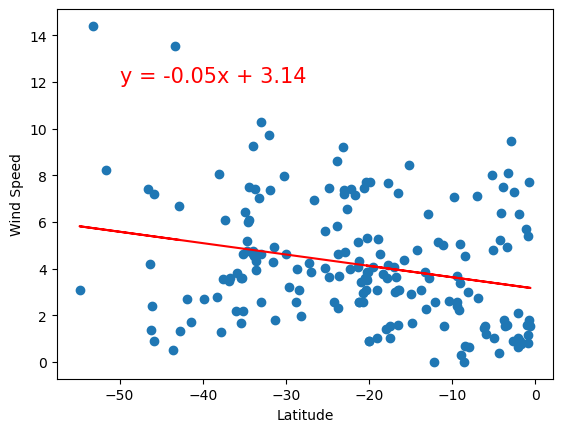

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE